# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import cv2

training_file = '/home/workspace/data/train.p'
validation_file= '/home/workspace/data/test.p'
testing_file = '/home/workspace/data/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_test.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

### Distribution of the class

From the signalname.csv file we have:<br />
ClassId,SignName     
0,Speed limit (20km/h)  
1,Speed limit (30km/h)  
2,Speed limit (50km/h)  
3,Speed limit (60km/h)  
4,Speed limit (70km/h)  
5,Speed limit (80km/h)  
6,End of speed limit (80km/h)  
7,Speed limit (100km/h)  
8,Speed limit (120km/h)  
9,No passing  
10,No passing for vehicles over 3.5 metric tons  
11,Right-of-way at the next intersection  
12,Priority road  
13,Yield  
14,Stop  
15,No vehicles  
16,Vehicles over 3.5 metric tons prohibited  
17,No entry  
18,General caution  
19,Dangerous curve to the left  
20,Dangerous curve to the right  
21,Double curve  
22,Bumpy road  
23,Slippery road  
24,Road narrows on the right  
25,Road work  
26,Traffic signals  
27,Pedestrians  
28,Children crossing  
29,Bicycles crossing  
30,Beware of ice/snow  
31,Wild animals crossing  
32,End of all speed and passing limits  
33,Turn right ahead  
34,Turn left ahead  
35,Ahead only  
36,Go straight or right  
37,Go straight or left  
38,Keep right  
39,Keep left  
40,Roundabout mandatory  
41,End of no passing  
42,End of no passing by vehicles over 3.5 metric tons  

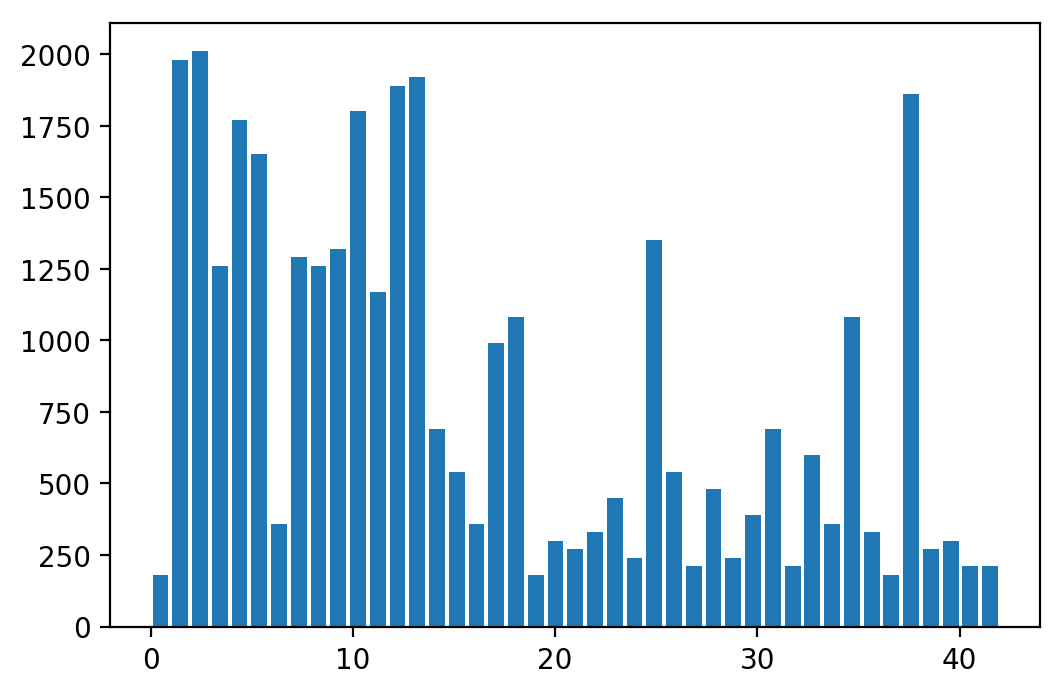

In [4]:
plt.figure(dpi=200)
plt.hist(y_train,n_classes,align = 'mid',rwidth=0.8)
plt.show()

From the above hist graph, we can see that inside each category of data, the number of images differs a lot which means for some of the traffic sign categories, the training data size is quite limited compared with others.

To solve this probelm, augumentation will be implemented to the original dataset to create more balance dataset

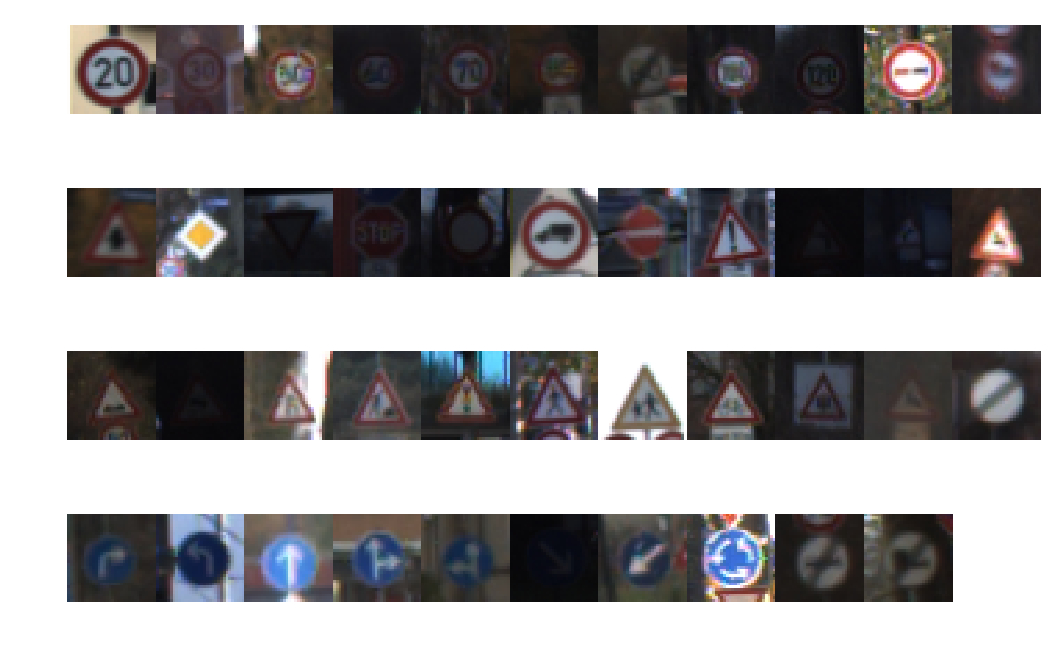

In [5]:
result = np.zeros(n_classes,dtype=int)
for i in range(n_classes):
    res = np.where(y_train == i)
    idx = res[0][0]
    result[i] = idx
fig, ax = plt.subplots(4,11,dpi = 180)
ax = ax.ravel()
for i in range(4*11):
    if i < n_classes:
        ax[i].axis('off')
        ax[i].imshow(X_train[result[i]])
    else:
        fig.delaxes(ax[i])
fig.tight_layout()
fig.subplots_adjust(hspace =0,wspace =0)

From the above implementation, we have a visualization of each category of the traffic sign. We can also see that for some of the traffic signs, the image quality is very limited. In this sense, augumentation of data is also needed to decrease the influence of unclear figures.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In this part, data processing is implemented. At first, the idea of processing data is to do normalization, grayscaling and augumentation. However, when I was training the model, the accuracy of the model is very hard to tuned to over 93%. After discussion with my mentor, Roman Smirnov, I decided to use color scale instead of grayscale since color is also part of information from traffic signs.

For normalization, the pixel values are divided by 255 such that the after-process pixel values are all between 0 and 1.

For augumentations, two types of bluring and ratation are used as iamge transformation. Then to balance off the difference of dataset, the goal of augumentation is to set the number of images for each category to 2200 and augument the images according to their current number.

### Augumentation of the model

In [6]:
def blur(img):
    return cv2.blur(img,(3,3))

def blur2(img):
    return cv2.medianBlur(img,3)
    
def rotate(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])


In [7]:
def random_aug(img):
    a = np.random.randint(0,3)
    if a == 0: img_aug = blur(img)
    if a == 1: img_aug = blur2(img)
    if a == 2: img_aug = rotate(img)
    return img_aug
def generate_aug(img,num):
    img_aug = []
    for i in range(num):
        img_aug.append(random_aug(img))
    return img_aug

In [8]:
# N = n_train*3
# X_aug = np.empty([N,32,32,3])
# y_aug = np.empty([N,])


# # The augmented data set include the original image, rotated image and perspective transform images
# def data_aug():
#     n = 0
#     for i in range(n_train):
#         img = X_train[i]
#         idx = y_train[i]
#         X_aug[n] =blur2(img)
#         y_aug[n] = idx
#         n += 1
#         X_aug[n] = rotate(img)
#         y_aug[n] = idx
#         n += 1
#         X_aug[n] = blur(img)
#         y_aug[n] = idx
# data_aug()
# X_process = np.append(X_train,X_aug,axis=0)
# y_process = np.append(y_train,y_aug)

In [9]:
X_sort = []
for num_sign in range(n_classes):
    image_sign = X_train[y_train == num_sign,...]
    X_sort.append(image_sign)

In [10]:
# To balance the difference of the data set. The size of each traffic sign will be augumented to 2200 samples
sign, count = np.unique(y_train, return_counts=True) # Traffic sign and the corresponding counts
add_num = []
X_aug = np.array(np.zeros((1, 32,32,3)))
y_aug = np.array([0])
iter_per_idx = []
for i in range(len(sign)):
    add_num.append(2200 - count[i])
    iter_per_idx.append((add_num[i]/count[i]).astype('uint32'))
    
for idx, image in enumerate(X_sort):
    print(idx)
    aug_img = []
    scales = iter_per_idx[idx]
    for img in image:
        if scales > 0:
            aug_img = generate_aug(img,scales)
            image = np.concatenate((image,aug_img),axis=0)
    new_idx = np.full(len(image),idx,dtype = 'uint8')
    X_aug = np.concatenate((image,X_aug),axis=0)
    y_aug = np.concatenate((new_idx,y_aug),axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


After balancing off, the hist graph of the dataset can be viewed as below, which is much more balanced compared with the original one.

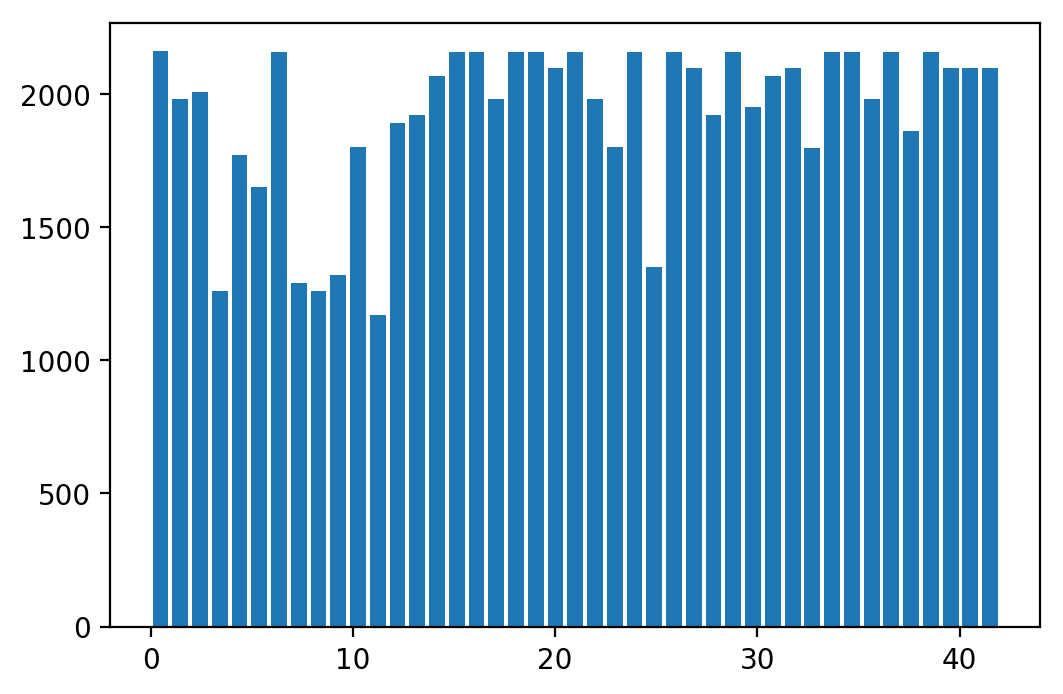

In [11]:
plt.figure(dpi=200)
plt.hist(y_aug,n_classes,align = 'mid',rwidth=0.8)
plt.show()

### Normalization

In [12]:
X_process = X_aug/255
y_train = y_aug
X_valid = X_valid/255
X_test = X_test/255

### Grayscale (This part is not implemented)

In [13]:
def gray(X):
    grayscle = 0.2989 * X[:,:,:,0] + 0.5870 * X[:,:,:,1] + 0.1140 * X[:,:,:,2]
    return grayscle.reshape(grayscle.shape + (1,))
print(np.shape(X_process))
print(np.shape(y_train))
print(np.shape(X_valid))
print(np.shape(y_valid))
print(np.shape(X_test))
print(np.shape(y_test))

(82918, 32, 32, 3)
(82918,)
(12630, 32, 32, 3)
(12630,)
(4410, 32, 32, 3)
(4410,)


### Model Architecture

The traning model is based on Lenet model with some modificaions:

* The input images are not set to grayscales since there's information regarding the traffic sign within the color.

* Hyperparameters are chosen as: epochs = 32 and batch size = 64 and initial learning rate of 0.001. Those values are chosen from trail and error suuch that the model accuracy is converging, the training time for each epoch is not too long and the model accuracy is improving with reasonable rate.

* Since the training data are based on color images instead of grayscale images which add to the complexity of the data. Thus, one more convolutional layer and two more fully connected layers are added.

* To reduce the influence of overfitting and keep the training accuary of the model, dropouts are used on all the convolutional layers as well as the fully connected layers. Different values of keep probabilities are used for convolutional dropout and fully connected dropout.

From the above modifications, the architecture of the model is as follows:
input 32x32x3   
Layer 1: Convolutional(32x32x32)+Relu+pooling+dropout(16,16,32)      
layer 2: Convolutional(16x16x64)+Relu+pooling +dropout(8x8x64)  
layer 3: Convolutional(8x8x128)+Relu+pooling (4x4x128)+dropout + flaten(2048)  
layer 4: Fully Connected+dropout  (512)     
layer 5: Fully Connected +dropout (128)  
Layer 6: Fully Connected +dropout (64)  
Layer 7: Fully Connected (43)

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [15]:
import tensorflow as tf
from sklearn.utils import shuffle

EPOCHS = 32
BATCH_SIZE = 64

In [16]:
from tensorflow.contrib.layers import flatten



def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    conv1 = tf.nn.relu(conv1)
    # pooling. Input = 32x32x32. Output = 16x16x32
    conv1 = tf.nn.max_pool(conv1,ksize= [1, 2, 2, 1],strides = [1, 2, 2, 1],padding = 'VALID')
    conv1 = tf.nn.dropout(conv1,keep_prob_conv)

    
    # layer 2: Convolutional. Input = 16x16x32. Output = 16x16x64
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    conv2 = tf.nn.relu(conv2)
    # pooling. Input = 16x16x64. Output = 8x8x64
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob_conv) # dropout
    
    
    # layer 3: Convolutional. Input = 8x8x64. Output = 8x8x128
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    conv3 = tf.nn.relu(conv3)
    # pooling. Input = 8x8x128. Output = 4x4x128
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3 = tf.nn.dropout(conv3, keep_prob_conv) # dropout
    
    # Flatten. Input = 4x4x128. Output = 2048.
    fc0   = flatten(conv3)
    
    # Layer 4: Fully Connected. Input = 2048. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # ReLu Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob) # dropout
    

    # Layer 5: Fully Connected. Input = 512. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    # ReLu Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob) # dropout
    
    # Layer 6: Fully Connected. Input = 128. Output = 64.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 64), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(64))
    fc3   = tf.matmul(fc2, fc3_W) + fc3_b
    # ReLu Activation.
    fc3    = tf.nn.relu(fc3)
    fc3    = tf.nn.dropout(fc3, keep_prob) # dropout
    
    # Layer 7: Fully Connected. Input = 64. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(64, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

The model is trained using epoch size of 32, batch size of 64 and learning rate 0.001 as initial learning rate. Then from the lenet lab, I also use the adam optimizer of optimize the learning rate as the training processes.

In [18]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
keep_prob_conv = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)


rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1.0, keep_prob_conv:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_process)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_process, y_train = shuffle(X_process, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_process[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.5,keep_prob_conv: 0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.235

EPOCH 2 ...
Validation Accuracy = 0.416

EPOCH 3 ...
Validation Accuracy = 0.550

EPOCH 4 ...
Validation Accuracy = 0.650

EPOCH 5 ...
Validation Accuracy = 0.725

EPOCH 6 ...
Validation Accuracy = 0.749

EPOCH 7 ...
Validation Accuracy = 0.801

EPOCH 8 ...
Validation Accuracy = 0.840

EPOCH 9 ...
Validation Accuracy = 0.868

EPOCH 10 ...
Validation Accuracy = 0.885

EPOCH 11 ...
Validation Accuracy = 0.871

EPOCH 12 ...
Validation Accuracy = 0.894

EPOCH 13 ...
Validation Accuracy = 0.908

EPOCH 14 ...
Validation Accuracy = 0.910

EPOCH 15 ...
Validation Accuracy = 0.921

EPOCH 16 ...
Validation Accuracy = 0.925

EPOCH 17 ...
Validation Accuracy = 0.922

EPOCH 18 ...
Validation Accuracy = 0.938

EPOCH 19 ...
Validation Accuracy = 0.931

EPOCH 20 ...
Validation Accuracy = 0.932

EPOCH 21 ...
Validation Accuracy = 0.933

EPOCH 22 ...
Validation Accuracy = 0.937

EPOCH 23 ...
Validation Accuracy = 0.938

EPOCH 24 ...
Validation Accura

Here after training the model, we test the accuracy of the test data set and we get accuracy of 94.8% which is okay but maybe not perfect.

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_accuracy = evaluate(X_process, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))    
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 0.998
Valid Accuracy = 0.948
Test Accuracy = 0.959


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

First, let's come back to the class id and corresponding sign name

In [22]:
import pandas as pd
sign_names = pd.read_csv('signnames.csv')
sign_names.head(43)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


### Load and Output the Images

Here, five images from the Internet are downloaded for testing the model. Within those images, the keep left, give way and traffic sign images have some background that might influence the prediction of the model. Also, for the 30 kpm speed limit sign, the brightness can also be an influencing fact. The results of prediction shows that since speed limit and give way sign has very similar red rings, this cloud lead to wrong predictions.

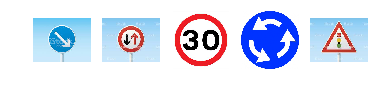

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
img_files = glob.glob('test/*.jpg')
n_new = len(img_files)
new_data = np.zeros((n_new, 32,32,3), dtype=np.uint8)
fig, ax = plt.subplots(1,n_new)
for i in range(n_new) :
    img = plt.imread(img_files[i])
    ax[i].imshow(img)
    ax[i].axis('off')
    img = cv2.resize(img, (32,32), interpolation=cv2.INTER_AREA) # resize to 32x32
    new_data[i] = img

### Predict the Sign Type for Each Image

Here we can see the prediction made by the model.

INFO:tensorflow:Restoring parameters from ./lenet


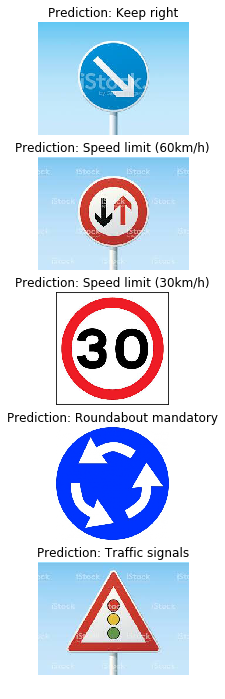

In [24]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def y_predict_model(X_data, top_k=1):
    num_examples = len(X_data)
    y_pred = np.zeros((num_examples, top_k), dtype=np.int32)
    y_prob = np.zeros((num_examples, top_k))
    with tf.Session() as sess:
        saver.restore(sess, './lenet')
        y_prob, y_pred = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=top_k), 
                             feed_dict={x:X_data, keep_prob:1, keep_prob_conv:1})
    return y_prob,y_pred


# preprocessomg of the new data
new_data = new_data/255
    
# make predictions
y_prob, y_pred = y_predict_model(new_data,top_k = 5)

# show the prediction results
fig, ax = plt.subplots(n_new,1, figsize=(10,12))
for i in range(n_new) :
    img = plt.imread(img_files[i])
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title('Prediction: '+sign_names.iloc[y_pred[i][0]]['SignName'])

### Analyze Performance

From the previous prediction, we can see the model recognize 4 out of 5 images. Therefore the accuracy of the 5 images are 80%.

And in the following we can see the softmax probabilities for the testing images

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

def visualize_models(y_prob,y_pred,X_data) :
    n_examples = len(X_data)
    fig, ax = plt.subplots(n_examples, 2,figsize=(10,8))
    
    for i in range(n_examples) :
        labels = y_pred[i]
        names = [sign_names.iloc[l]['SignName'] for l in labels]
        bar_locations = np.arange(5)[::-1]
        ax[i,0].imshow(X_data[i])
        ax[i,0].axis('off')
        ax[i,1].barh(bar_locations, y_prob[i])
        ax[i,1].set_yticks(0.5+bar_locations)
        ax[i,1].set_yticklabels(names)
        ax[i,1].yaxis.tick_right()
        ax[i,1].set_xlim([0,1])
    ax[0,1].set_title('Model Prediction')
    fig.tight_layout()
    
visualize_models(y_prob,y_pred,new_data)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")